<a href="https://colab.research.google.com/github/ludmilaexbrayat/recognizing-packagings/blob/master/191107_Defining_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
# CONSTANTS
DIST_INTERBAC = 100
DIST_BAC = 50
DIST_MAT = 25

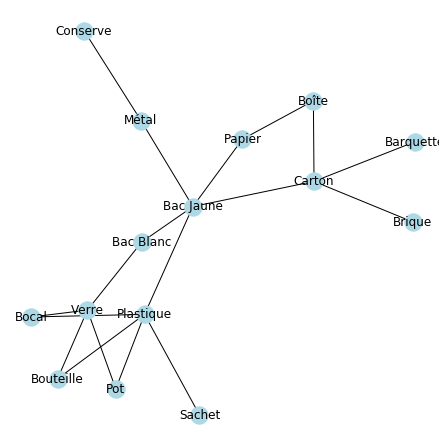

In [118]:
# Creating Graph
G = nx.Graph()

# Adding Nodes and Edges
G.add_weighted_edges_from([
                           ('Bac Jaune',    'Bac Blanc',      DIST_INTERBAC),


                           ('Métal',        'Bac Jaune',      DIST_BAC),
                           ('Verre',        'Bac Blanc',      DIST_BAC),
                           ('Plastique',    'Bac Jaune',      DIST_BAC),
                           ('Papier',       'Bac Jaune',      DIST_BAC),
                           ('Carton',       'Bac Jaune',      DIST_BAC),


                           ('Bouteille',    'Plastique',      DIST_MAT),
                           ('Bouteille',    'Verre',          DIST_MAT),

                           ('Pot',          'Verre',          DIST_MAT),
                           ('Pot',          'Plastique',      DIST_MAT),

                           ('Bocal',        'Verre',          DIST_MAT),
                           ('Bocal',        'Plastique',      DIST_MAT),

                           ('Brique',       'Carton',         DIST_MAT),

                           ('Barquette',    'Carton',         DIST_MAT),

                           ('Sachet',       'Plastique',      DIST_MAT),

                           ('Conserve',     'Métal',          DIST_MAT),

                           ('Boîte',        'Carton',         DIST_MAT),
                           ('Boîte',        'Papier',         DIST_MAT)
                           
                           ])

# Plotting Graph
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_color='lightblue')
plt.show()

In [0]:
# Creating Loss
summary = pd.DataFrame(columns=list(np.array(G.nodes)[2:]))
for node in list(np.array(G.nodes)[2:]):
  for column in summary.columns:
    summary.loc[node, column] = nx.dijkstra_path_length(G, node, column)

In [123]:
summary

,Métal,Verre,Plastique,Papier,Carton,Bouteille,Pot,Bocal,Brique,Barquette,Sachet,Conserve,Boîte
Métal,0.0,150.0,100.0,100.0,100.0,125.0,125.0,125.0,125.0,125.0,125.0,25.0,125.0
Verre,150.0,0.0,50.0,150.0,150.0,25.0,25.0,25.0,175.0,175.0,75.0,175.0,175.0
Plastique,100.0,50.0,0.0,100.0,100.0,25.0,25.0,25.0,125.0,125.0,25.0,125.0,125.0
Papier,100.0,150.0,100.0,0.0,50.0,125.0,125.0,125.0,75.0,75.0,125.0,125.0,25.0
Carton,100.0,150.0,100.0,50.0,0.0,125.0,125.0,125.0,25.0,25.0,125.0,125.0,25.0
Bouteille,125.0,25.0,25.0,125.0,125.0,0.0,50.0,50.0,150.0,150.0,50.0,150.0,150.0
Pot,125.0,25.0,25.0,125.0,125.0,50.0,0.0,50.0,150.0,150.0,50.0,150.0,150.0
Bocal,125.0,25.0,25.0,125.0,125.0,50.0,50.0,0.0,150.0,150.0,50.0,150.0,150.0
Brique,125.0,175.0,125.0,75.0,25.0,150.0,150.0,150.0,0.0,50.0,150.0,150.0,50.0
Barquette,125.0,175.0,125.0,75.0,25.0,150.0,150.0,150.0,50.0,0.0,150.0,150.0,50.0


In [0]:
# Defining Loss
loss_matrix = summary.values

In [0]:
# Example
pred = np.array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
true = np.array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# Loss Computation
pred.dot(loss_matrix).dot(true)